In [1]:
import pandas as pd

df = pd.read_csv('data\\top5_keepers.csv')
df2 = pd.read_csv('data\\other_keepers.csv')
df.head()

,player,age,nationality,position,team,gk_games,minutes_90s,gk_goals_against,gk_goals_against_per90,gk_shots_on_target_against,...,gk_passes_throws,gk_pct_passes_launched,gk_passes_length_avg,gk_goal_kicks,gk_pct_goal_kicks_launched,gk_goal_kick_length_avg,gk_crosses_stopped,gk_crosses_stopped_pct,gk_def_actions_outside_pen_area_per90,gk_avg_distance_def_actions
0,Noah Atubolu,21,de GER,GK,Freiburg,34.0,34.0,58.0,1.71,158.0,...,160.0,35.4,34.2,241.0,67.2,50.7,31.0,6.4,0.88,13.6
1,Daniel Batz,32,de GER,GK,Mainz 05,4.0,4.0,3.0,0.75,17.0,...,14.0,38.6,34.7,21.0,33.3,34.8,4.0,10.5,0.50,11.3
2,Oliver Baumann,33,de GER,GK,Hoffenheim,34.0,34.0,66.0,1.94,211.0,...,165.0,33.7,32.7,249.0,55.4,44.9,31.0,5.7,2.15,16.7
3,Janis Blaswich,32,de GER,GK,RB Leipzig,21.0,21.0,30.0,1.43,76.0,...,89.0,14.7,25.7,134.0,25.4,30.7,16.0,6.4,1.76,17.6
4,Fabian Bredlow,28,de GER,GK,Stuttgart,4.0,4.0,3.0,0.75,22.0,...,15.0,31.5,31.0,11.0,72.7,51.7,1.0,1.8,1.25,16.6


In [2]:
turn_per90 = ['gk_shots_on_target_against', 'gk_saves', 'gk_passes', 'gk_goal_kicks', 'gk_passes_throws']
turn_per_match = ['gk_free_kick_goals_against', 'gk_corner_kick_goals_against', 'gk_own_goals_against']
rename = {}

for col in turn_per90:
    rename[col] = f'{col}_per90'
    df[col] = df[col] / df['minutes_90s']
    df2[col] = df2[col] / df2['minutes_90s']

for col in turn_per_match:
    rename[col] = f'{col}_perGame'
    df[col] = df[col] / df['gk_games']
    df2[col] = df2[col] / df2['gk_games']

df['gk_clean_sheets'] = round((100*df['gk_clean_sheets'] / df['gk_games']), 2)
df2['gk_clean_sheets'] = round((100*df2['gk_clean_sheets'] / df2['gk_games']), 2)

df = df.rename(columns = rename)
df2 = df2.rename(columns = rename)

In [3]:
len(df[(df.gk_games >= 10) & (df.minutes_90s >= 10)]), len(df), len(df2[(df2.gk_games >= 10) & (df2.minutes_90s >= 10)]), len(df2)

(116, 202, 120, 207)

In [4]:
df = df[(df.gk_games >= 10) & (df.minutes_90s >= 10)]
df2 = df2[(df2.gk_games >= 10) & (df2.minutes_90s >= 10)]
df['top5'] = True
df2['top5'] = False
ind = ['player', 'age', 'nationality', 'position', 'team', 'top5','minutes_90s']
df.set_index(ind, inplace = True)
df2.set_index(ind, inplace = True)
df2

,,,,,,,gk_games,gk_goals_against,gk_goals_against_per90,gk_shots_on_target_against_per90,gk_saves_per90,gk_save_pct,gk_clean_sheets,gk_pens_saved,gk_pens_save_pct,gk_free_kick_goals_against_perGame,...,gk_passes_throws_per90,gk_pct_passes_launched,gk_passes_length_avg,gk_goal_kicks_per90,gk_pct_goal_kicks_launched,gk_goal_kick_length_avg,gk_crosses_stopped,gk_crosses_stopped_pct,gk_def_actions_outside_pen_area_per90,gk_avg_distance_def_actions
player,age,nationality,position,team,top5,minutes_90s,,,,,,,,,,,,,,,,,,,,,
Arnaud Bodart,25,be BEL,GK,Standard Liège,False,29.0,29.0,35.0,1.21,4.620690,3.379310,77.6,17.24,1.0,16.7,0.000000,...,4.517241,42.3,36.9,7.724138,42.4,37.4,29.0,7.0,0.59,11.5
Sinan Bolat,34,tr TUR,GK,Westerlo,False,26.0,26.0,44.0,1.69,5.076923,3.423077,68.9,19.23,0.0,0.0,0.038462,...,4.076923,32.7,33.0,7.076923,33.7,34.0,20.0,5.6,0.65,12.6
Jean Butez,28,fr FRA,GK,Antwerp,False,30.0,30.0,27.0,0.90,3.233333,2.366667,77.3,40.00,0.0,0.0,0.000000,...,5.066667,31.4,32.5,4.366667,44.3,39.2,36.0,10.6,1.50,15.8
Gaëtan Coucke,24,be BEL,GK,Mechelen,False,30.0,30.0,34.0,1.13,4.133333,3.000000,73.4,33.33,1.0,50.0,0.033333,...,3.466667,32.7,32.3,8.400000,60.7,42.7,32.0,6.9,0.70,11.9
Théo Defourny,31,be BEL,GK,RWD Molenbeek,False,29.8,30.0,66.0,2.22,5.973154,3.691275,69.7,13.33,3.0,20.0,0.033333,...,2.986577,52.4,39.5,7.684564,61.6,43.3,11.0,2.1,0.34,9.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Filip Stankovic,21,rs SRB,GK,Sampdoria,False,37.0,37.0,49.0,1.32,4.027027,2.675676,71.1,21.62,1.0,14.3,0.027027,...,4.000000,29.1,30.6,6.270270,39.7,35.0,42.0,7.2,0.73,13.3
Emiliano Viviano,37,it ITA,GK,Ascoli,False,26.5,27.0,32.0,1.21,3.471698,2.301887,71.7,29.63,1.0,14.3,0.037037,...,1.773585,61.7,44.0,5.660377,82.0,53.3,30.0,7.3,0.64,11.7
Jeroen Zoet,32,nl NED,GK,Spezia,False,25.0,25.0,29.0,1.16,4.000000,2.840000,74.0,28.00,1.0,25.0,0.040000,...,3.600000,44.0,37.3,7.920000,59.6,45.4,21.0,5.7,0.92,14.1


In [5]:
with open('keepers_vars.csv', 'r') as file:
    vars = file.readline()

vars = vars.split(',')
vars[-1] = vars[-1].strip('\n')

In [6]:
df = df[vars]
df2 = df2[vars]
df.columns, df2.columns

(Index(['gk_goals_against', 'gk_saves_per90', 'gk_clean_sheets',
        'gk_pens_save_pct', 'gk_free_kick_goals_against_perGame',
        'gk_corner_kick_goals_against_perGame', 'gk_own_goals_against_perGame',
        'gk_psnpxg_per_shot_on_target_against', 'xg_saved_per90',
        'gk_passes_pct_launched', 'gk_passes_per90', 'gk_passes_throws_per90',
        'gk_passes_length_avg', 'gk_goal_kicks_per90',
        'gk_goal_kick_length_avg', 'gk_crosses_stopped_pct',
        'gk_def_actions_outside_pen_area_per90', 'gk_avg_distance_def_actions'],
       dtype='object'),
 Index(['gk_goals_against', 'gk_saves_per90', 'gk_clean_sheets',
        'gk_pens_save_pct', 'gk_free_kick_goals_against_perGame',
        'gk_corner_kick_goals_against_perGame', 'gk_own_goals_against_perGame',
        'gk_psnpxg_per_shot_on_target_against', 'xg_saved_per90',
        'gk_passes_pct_launched', 'gk_passes_per90', 'gk_passes_throws_per90',
        'gk_passes_length_avg', 'gk_goal_kicks_per90',
        'gk_

In [7]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_standardized1 = scaler.fit_transform(df)
df_standardized2 = scaler.fit_transform(df2)

df_standardized1 = pd.DataFrame(df_standardized1, columns = df.columns, index = df.index)
df_standardized2 = pd.DataFrame(df_standardized2, columns = df2.columns, index = df2.index)
df_standardized2

,,,,,,,gk_goals_against,gk_saves_per90,gk_clean_sheets,gk_pens_save_pct,gk_free_kick_goals_against_perGame,gk_corner_kick_goals_against_perGame,gk_own_goals_against_perGame,gk_psnpxg_per_shot_on_target_against,xg_saved_per90,gk_passes_pct_launched,gk_passes_per90,gk_passes_throws_per90,gk_passes_length_avg,gk_goal_kicks_per90,gk_goal_kick_length_avg,gk_crosses_stopped_pct,gk_def_actions_outside_pen_area_per90,gk_avg_distance_def_actions
player,age,nationality,position,team,top5,minutes_90s,,,,,,,,,,,,,,,,,,
Arnaud Bodart,25,be BEL,GK,Standard Liège,False,29.0,-0.195500,0.672337,-0.818812,0.075505,-0.780465,-0.363890,-1.002427,-1.622041,0.346350,-1.241286,-0.592284,0.056817,0.478049,0.431834,-0.725734,0.260576,-0.855029,-0.951575
Sinan Bolat,34,tr TUR,GK,Westerlo,False,26.0,0.367540,0.737957,-0.633414,-0.685624,0.650327,0.495979,-0.007739,0.273851,-0.140071,-0.354553,0.247043,-0.336801,-0.262278,0.101127,-1.164465,-0.342410,-0.736663,-0.500721
Jean Butez,28,fr FRA,GK,Antwerp,False,30.0,-0.695980,-0.845930,1.301625,-0.685624,-0.780465,-0.715208,-0.140364,-1.306059,0.508491,0.364871,1.992993,0.547970,-0.357192,-1.283734,-0.493465,1.811114,0.940186,0.810854
Gaëtan Coucke,24,be BEL,GK,Mechelen,False,30.0,-0.258060,0.103633,0.680214,1.593205,0.459555,-1.332676,-0.140364,0.589833,1.319193,1.167949,-0.145021,-0.882333,-0.395158,0.777180,-0.041830,0.217506,-0.638025,-0.787628
Théo Defourny,31,be BEL,GK,RWD Molenbeek,False,29.8,1.743859,1.140070,-1.183088,0.225908,0.459555,2.372132,-0.140364,0.589833,0.616584,0.799872,-1.017808,-1.311504,0.971601,0.411613,0.035593,-1.849877,-1.348219,-1.607362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Filip Stankovic,21,rs SRB,GK,Sampdoria,False,37.0,0.680340,-0.382630,-0.410749,-0.033879,0.224957,-0.890435,-1.002427,-0.674095,-0.302212,-0.873208,0.061275,-0.405566,-0.717865,-0.311049,-1.035427,0.346717,-0.578842,-0.213814
Emiliano Viviano,37,it ITA,GK,Ascoli,False,26.5,-0.383180,-0.943055,0.335503,-0.033879,0.597335,-0.269259,0.913269,-0.674095,0.346350,1.586219,-0.978990,-2.395846,1.825825,-0.622686,1.325978,0.389788,-0.756390,-0.869601
Jeroen Zoet,32,nl NED,GK,Spezia,False,25.0,-0.570860,-0.136256,0.183644,0.453791,0.707559,0.210994,0.032049,-1.306059,0.184210,0.247755,-1.264652,-0.763141,0.553980,0.531914,0.306574,-0.299340,-0.204017,0.114080


In [8]:
df_standardized = pd.concat([df_standardized1, df_standardized2])
del df, df2, df_standardized1, df_standardized2
df_standardized.sample(10)

,,,,,,,gk_goals_against,gk_saves_per90,gk_clean_sheets,gk_pens_save_pct,gk_free_kick_goals_against_perGame,gk_corner_kick_goals_against_perGame,gk_own_goals_against_perGame,gk_psnpxg_per_shot_on_target_against,xg_saved_per90,gk_passes_pct_launched,gk_passes_per90,gk_passes_throws_per90,gk_passes_length_avg,gk_goal_kicks_per90,gk_goal_kick_length_avg,gk_crosses_stopped_pct,gk_def_actions_outside_pen_area_per90,gk_avg_distance_def_actions
player,age,nationality,position,team,top5,minutes_90s,,,,,,,,,,,,,,,,,,
Illan Meslier,23,fr FRA,GK,Leeds United,False,43.6,0.117300,-1.540106,1.386405,-0.685624,-0.780465,0.042594,0.173113,-0.042131,-0.302212,-1.810133,1.578872,-0.024206,-1.344296,-1.639851,-0.248292,-0.643904,0.249719,-0.377761
Ben Hamer,35,eng ENG,GK,Watford,False,19.0,-0.633420,0.577100,-0.953902,2.354334,1.177461,-0.666460,0.358725,-0.042131,0.616584,-1.040516,1.021897,0.017880,-1.135486,-2.143420,-0.699926,-0.945397,0.170808,0.196053
Seny Dieng,28,sn SEN,GK,Middlesbrough,False,35.0,0.555220,-0.795953,0.236748,-0.685624,0.282409,0.475623,0.475395,0.905815,-0.140071,-0.923401,1.088637,0.003093,-1.192434,-1.120710,-0.751542,-0.083987,1.078280,1.097761
Conor Hazard,25,nir NIR,GK,Plymouth Argyle,False,27.0,0.492660,0.492344,-0.699561,-0.685624,0.597335,0.759855,0.913269,1.537780,0.076116,-1.860325,0.418016,0.819463,0.497032,0.345694,-0.428946,-0.859256,-0.855029,-0.746641
Tom Vandenberghe,30,be BEL,GK,Kortrijk,False,21.0,0.555220,1.460153,-1.981512,-0.685624,-0.780465,1.445930,2.692129,2.169744,0.130163,-0.304361,-0.508027,0.445805,1.161429,0.232145,-0.119253,0.605140,-0.421021,-0.951575
Andrea Seculin,33,it ITA,GK,Modena,False,16.5,-0.946220,-0.850474,-0.780615,0.453791,-0.780465,1.082714,-1.002427,-0.042131,-0.248165,0.348140,0.207517,-1.976732,-0.452106,-1.130443,-0.738638,-1.246891,-0.815573,-0.254801
Bartłomiej Drągowski,25,pl POL,GK,Spezia,False,13.0,-1.133900,0.680291,-0.274728,-0.685624,2.081119,2.633369,0.986949,-0.358113,-0.194118,0.532179,-1.045974,-0.474330,-0.490072,-0.134706,-0.880580,-1.462243,-0.657752,0.155066
João Gonçalves,22,pt POR,GK,Boavista,False,34.0,1.493619,0.500510,-1.603262,-0.685624,1.407805,-0.279348,-0.241783,1.221797,-0.356259,-0.505131,-1.607082,-0.090057,0.326187,1.234048,0.061401,-0.988468,-0.618297,-0.746641
Vinicius Silvestre,29,br BRA,GK,Portimonense,False,14.0,-0.258060,0.746195,-1.759780,-0.685624,-0.780465,1.004882,4.539407,1.221797,-1.004821,0.783141,-0.929311,-0.469418,0.743808,1.667729,0.035593,-0.213199,-1.170671,-1.648349


In [9]:
from factor_analyzer import calculate_bartlett_sphericity, calculate_kmo
calculate_bartlett_sphericity(df_standardized)

(1723.0921606515853, 1.426567562444855e-263)

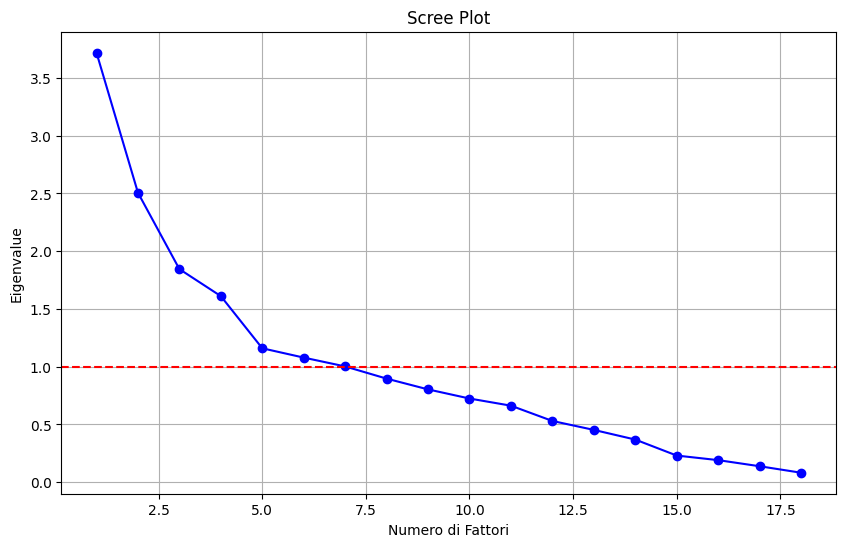

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5,Factor_6,Factor_7,Factor_8,Factor_9,Factor_10,Factor_11,Factor_12,Factor_13,Factor_14,Factor_15,Factor_16,Factor_17,Factor_18
Eigenvalue,3.718922,2.506665,1.844991,1.611029,1.159251,1.078693,1.002117,0.89658,0.803244,0.724292,0.662265,0.529958,0.452511,0.368800,0.230378,0.190718,0.137874,0.081712
Proporzione Varianza,0.206607,0.139259,0.102499,0.089502,0.064403,0.059927,0.055673,0.04981,0.044625,0.040238,0.036793,0.029442,0.025140,0.020489,0.012799,0.010595,0.007660,0.004540
Varianza Cumulativa,0.206607,0.345866,0.448365,0.537867,0.602270,0.662197,0.717870,0.76768,0.812305,0.852544,0.889336,0.918778,0.943918,0.964407,0.977205,0.987801,0.995460,1.000000


In [10]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt

nfac = df_standardized.shape[1]

fa = FactorAnalyzer(n_factors=nfac, rotation=None, method = 'principal', svd_method = 'lapack')
fa.fit(df_standardized)

eigenvalues, _ = fa.get_eigenvalues()

plt.figure(figsize=(10, 6))
plt.plot(range(1, len(eigenvalues) + 1), eigenvalues, 'o-', color='blue')
plt.title('Scree Plot')
plt.xlabel('Numero di Fattori')
plt.ylabel('Eigenvalue')
plt.axhline(y=1, color='r', linestyle='--')
plt.grid()
plt.show()

var = fa.get_factor_variance()
pd.DataFrame(var, columns = [f'Factor_{i}' for i in range(1, fa.n_factors + 1)], index = ['Eigenvalue', 'Proporzione Varianza', 'Varianza Cumulativa'])

In [11]:
colss = [f'Factor_{i}' for i in range(1,6)]
corr_mat = pd.DataFrame(fa.loadings_).corr().loc[:4, :4]
corr_mat.columns = colss
corr_mat.index = colss
corr_mat

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5
Factor_1,1.000000,-0.067571,-0.084879,-0.030192,-0.003795
Factor_2,-0.067571,1.000000,-0.324563,-0.115449,-0.014511
Factor_3,-0.084879,-0.324563,1.000000,-0.145020,-0.018228
Factor_4,-0.030192,-0.115449,-0.145020,1.000000,-0.006484
Factor_5,-0.003795,-0.014511,-0.018228,-0.006484,1.000000


In [19]:
fa_obl = FactorAnalyzer(n_factors=5, rotation='oblimin', method = 'principal')
fa_obl.fit(df_standardized)
var = fa_obl.get_factor_variance()
pd.DataFrame(var, columns = [f'Factor_{i}' for i in range(1, fa_obl.n_factors + 1)], 
             index = ['Eigenvalue', 'Proporzione Varianza', 'Varianza Cumulativa'])

,Factor_1,Factor_2,Factor_3,Factor_4,Factor_5
Eigenvalue,2.466055,2.499136,1.692893,2.358349,1.565552
Proporzione Varianza,0.137003,0.138841,0.094050,0.131019,0.086975
Varianza Cumulativa,0.137003,0.275844,0.369894,0.500913,0.587888


In [20]:
coms = fa_obl.get_communalities()
coms = pd.DataFrame(coms, index = df_standardized.columns, columns = ['communality'])
coms.sort_values(by = 'communality', ascending = False).head()

,communality
gk_def_actions_outside_pen_area_per90,0.874057
gk_passes_length_avg,0.833872
gk_goal_kick_length_avg,0.832670
gk_avg_distance_def_actions,0.797244
gk_saves_per90,0.730515


In [21]:
coms.sort_values(by = 'communality', ascending = False).tail()

,communality
gk_goals_against,0.459665
gk_corner_kick_goals_against_perGame,0.455208
gk_psnpxg_per_shot_on_target_against,0.399054
gk_passes_pct_launched,0.314556
gk_free_kick_goals_against_perGame,0.060689


In [22]:
import numpy as np
structure_loadings = np.dot(fa_obl.loadings_, fa_obl.phi_)
obl_loadings = pd.DataFrame(structure_loadings, columns = [f'Factor_{i}' for i in range(1, fa_obl.n_factors + 1)],
                    index = df_standardized.columns)
for i in obl_loadings.columns:
    print(f'{i}: {len(obl_loadings[np.abs(obl_loadings[i]) > 0.5])}')

Factor_1: 4
Factor_2: 4
Factor_3: 2
Factor_4: 3
Factor_5: 2


In [23]:
correlated_vars = []

for i in obl_loadings.columns:
    print(i)
    print(obl_loadings.loc[np.abs(obl_loadings[i]) > 0.5, i])
    correlated_vars += list(obl_loadings[np.abs(obl_loadings[i]) > 0.5].index)
    print('-'*24)

correlated_vars = list(set(correlated_vars))

Factor_1
gk_goals_against                        0.613948
gk_saves_per90                          0.799847
gk_clean_sheets                        -0.723127
gk_corner_kick_goals_against_perGame    0.539776
Name: Factor_1, dtype: float64
------------------------
Factor_2
gk_passes_per90                          0.666440
gk_goal_kicks_per90                     -0.502218
gk_def_actions_outside_pen_area_per90    0.925952
gk_avg_distance_def_actions              0.880445
Name: Factor_2, dtype: float64
------------------------
Factor_3
gk_pens_save_pct    0.677775
xg_saved_per90      0.841391
Name: Factor_3, dtype: float64
------------------------
Factor_4
gk_passes_length_avg       0.928014
gk_goal_kicks_per90        0.617120
gk_goal_kick_length_avg    0.886966
Name: Factor_4, dtype: float64
------------------------
Factor_5
gk_passes_throws_per90    0.611479
gk_crosses_stopped_pct    0.772164
Name: Factor_5, dtype: float64
------------------------


factor 1 -> sotto pressione
factor 2 -> sweeper keeper
factor 3 -> difesa di area

In [24]:
labels = ['Sotto_Pressione', 'Sweeper_Keeper', 'Miracolo', 'Tradizionale', 'Difesa_di_Area']
corr_mat = pd.DataFrame(fa_obl.phi_)
corr_mat.columns = labels
corr_mat.index = labels
corr_mat

,Sotto_Pressione,Sweeper_Keeper,Miracolo,Tradizionale,Difesa_di_Area
Sotto_Pressione,1.000000,-0.024638,-0.074250,0.184333,0.003585
Sweeper_Keeper,-0.024638,1.000000,0.019537,-0.143730,0.078346
Miracolo,-0.074250,0.019537,1.000000,-0.057246,0.224226
Tradizionale,0.184333,-0.143730,-0.057246,1.000000,-0.130122
Difesa_di_Area,0.003585,0.078346,0.224226,-0.130122,1.000000


In [18]:
scores_obl = fa_obl.transform(df_standardized)
scores_obl = pd.DataFrame(scores_obl, index = df_standardized.index, columns = labels)
scores_obl

,,,,,,,Sotto_Pressione,Sweeper_Keeper,Miracolo,Tradizionale,Difesa_di_Area
player,age,nationality,position,team,top5,minutes_90s,,,,,
Noah Atubolu,21,de GER,GK,Freiburg,True,34.0,0.293204,0.007797,-0.058440,0.566072,0.068506
Oliver Baumann,33,de GER,GK,Hoffenheim,True,34.0,1.604303,1.240221,0.569867,0.587927,0.083177
Janis Blaswich,32,de GER,GK,RB Leipzig,True,21.0,-0.298102,1.256159,-1.635008,-1.112913,0.055827
Koen Casteels,31,be BEL,GK,Wolfsburg,True,25.0,0.055370,0.785277,-0.016657,0.606385,0.357922
Finn Dahmen,25,de GER,GK,Augsburg,True,31.0,0.800718,0.863335,-0.170249,0.343843,-0.596307
...,...,...,...,...,...,...,...,...,...,...,...
Filip Stankovic,21,rs SRB,GK,Sampdoria,False,37.0,-0.143483,-0.356789,-0.316124,-0.683072,0.233624
Emiliano Viviano,37,it ITA,GK,Ascoli,False,26.5,-1.490355,-0.500484,0.209453,1.683864,-0.692568
Jeroen Zoet,32,nl NED,GK,Spezia,False,25.0,-0.554383,-0.639862,0.217437,0.538342,-0.330560


In [19]:
pd.DataFrame(np.corrcoef(scores_obl, rowvar = False), columns = labels, index = labels)

,Sotto_Pressione,Sweeper_Keeper,Miracolo,Tradizionale,Difesa_di_Area
Sotto_Pressione,1.000000,-0.024638,-0.074250,0.184333,0.003585
Sweeper_Keeper,-0.024638,1.000000,0.019537,-0.143730,0.078346
Miracolo,-0.074250,0.019537,1.000000,-0.057246,0.224226
Tradizionale,0.184333,-0.143730,-0.057246,1.000000,-0.130122
Difesa_di_Area,0.003585,0.078346,0.224226,-0.130122,1.000000


In [20]:
for col in scores_obl.columns:
    player1 = scores_obl[scores_obl[col] == scores_obl[col].max()].index[0][0]
    player2 = scores_obl[scores_obl[col] == scores_obl[col].min()].index[0][0]
    print(f'{col}\ntop player: {player1}\nflop player: {player2}')

Sotto_Pressione
top player: James Trafford
flop player: Walter Benítez
Sweeper_Keeper
top player: Justin Bijlow
flop player: Francesco Bardi
Miracolo
top player: Arijanet Muric
flop player: Riccardo Melgrati
Tradizionale
top player: Viktor Johansson
flop player: Bart Verbruggen
Difesa_di_Area
top player: Mike Maignan
flop player: Warleson


In [21]:
import matplotlib.pyplot as plt

def plot_factors(labels, df = scores_obl):
    x = labels[0]
    y = labels[1]
    
    fig, ax = plt.subplots(figsize = (12,7))
    colors = np.random.rand(len(df))
    
    xmin = df[x].min() 
    xmax = df[x].max() 
    ymin = df[y].min() 
    ymax = df[y].max() 
    xmed = df[x].mean()
    ymed = df[y].mean()

    xpquart = df[x].quantile(.2)
    ypquart = df[y].quantile(.2)
    xtquart = df[x].quantile(.8)
    ytquart = df[y].quantile(.8)
    
    plt.scatter(x = df[x], y = df[y], c = colors, alpha = 0.5)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.hlines(y = ymed, xmin = xmin, xmax = xmax, linestyle = '--', color = 'grey')
    plt.vlines(x = xmed, ymin = ymin, ymax = ymax, linestyle = '--', color = 'grey')
    ax.set_xticks([])
    ax.set_yticks([])
    for point in df.index:
        xp = df.loc[point, x]
        yp = df.loc[point, y]
            
        txt = point[0]
        if ((xp > xtquart) or (xp < xpquart)) and ((yp > ytquart) or  (yp < ypquart)):
            plt.annotate(txt, xy = (xp, yp))
    plt.show()

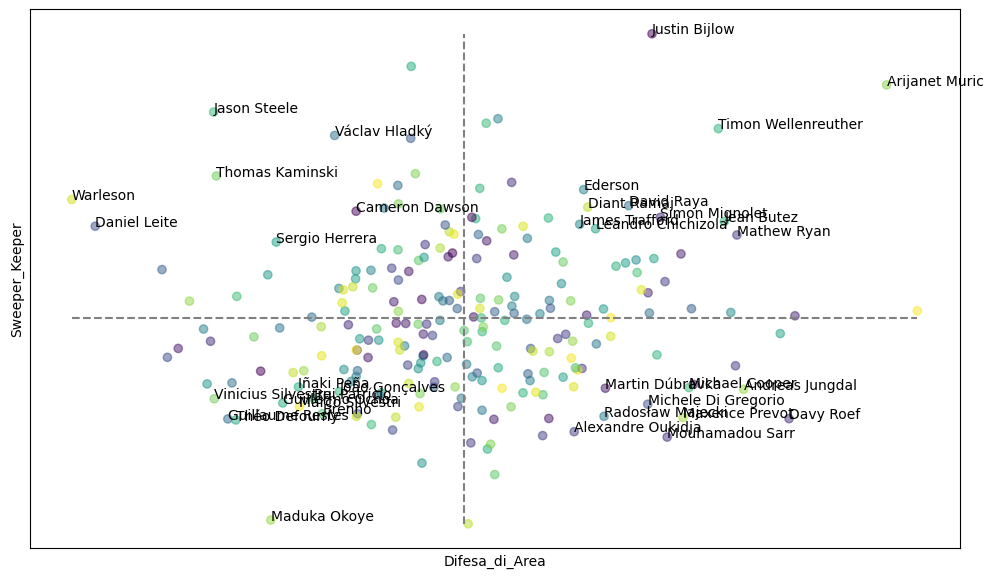

In [22]:
plot_factors(['Difesa_di_Area', 'Sweeper_Keeper'])

In [29]:
scores_obl.xs('Atalanta', level = 'team')

,,,,,,Sotto_Pressione,Sweeper_Keeper,Miracolo,Tradizionale,Difesa_di_Area
player,age,nationality,position,top5,minutes_90s,,,,,
Marco Carnesecchi,23,it ITA,GK,True,26.9,-0.550165,-0.329865,0.660275,0.409555,0.953156
Juan Musso,29,ar ARG,GK,True,11.0,-0.780992,0.310660,0.095720,-0.596756,1.325784


In [55]:
scores_obl.to_csv('gk_factors.csv')

In [30]:
len(correlated_vars)

14

In [31]:
set(df_standardized.columns) - set(correlated_vars)

{'gk_free_kick_goals_against_perGame',
 'gk_own_goals_against_perGame',
 'gk_passes_pct_launched',
 'gk_psnpxg_per_shot_on_target_against'}

In [32]:
from scipy.stats import chi

def mardia_test(X):
    n, p = X.shape
    S = np.cov(X, rowvar=False)
    S_inv = np.linalg.inv(S)

    if np.linalg.cond(S) > 1 / np.finfo(S.dtype).eps:
        print("La matrice di covarianza è mal condizionata.")
        return None, None, None
    # Skewness multivariata
    b1_p = np.sum([np.dot(np.dot(X[i], S_inv), X[i])**3 for i in range(n)]) / n**2
    
    # Kurtosis multivariata
    b2_p = np.sum([np.dot(np.dot(X[i], S_inv), X[i])**2 for i in range(n)]) / n
    
    # Expected kurtosis under normality
    kurtosis_expected = p * (p + 2)
    
    return b1_p, b2_p, kurtosis_expected

mardia_skew, mardia_kurtosis, exp_kurtosis = mardia_test(df_standardized[correlated_vars].values)
print(f"Mardia Skewness: {mardia_skew}")
print(f"Mardia Kurtosis: {mardia_kurtosis} on expected Kurtosis {exp_kurtosis}")

Mardia Skewness: 27.842015981972622
Mardia Kurtosis: 254.04355914167942 on expected Kurtosis 224


In [33]:
df_standardized.to_csv('gk_preprocc.csv')